# Example: Correlation with Memory

In this example, we will construct synthetic autocorrelated time series using the definition of red noise. 

We will then take a look at the implications of autocorrelation by examining how the magnitude of autocorrelation in these time series (i.e., the magnitude of the coefficient $a$) influences correlations *between* time series.

In [1]:
# load packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',size=16,weight='bold') #set default font size and weight for plots

Here, we will generate four different red noise time series. Note that we have used these time series [previously](https://kls2177.github.io/Climate-and-Geophysical-Data-Analysis/chapters/Week4/corr_rev.html), but the details were hidden. 

First, we need to definte our $a$ coefficients.

In [2]:
# vector of a coefficients, the lag-1 autocorrelations
autocorr = np.array([0, .4, .7, .9]) 

We have defined four values for the coefficient, $a$ (i.e., the lag-1 autocorrelation). The first value is zero, corresponding to a white noise time series and the remaining three consecutively increase in magnitude.

Now, we will generate the time series by looping over the different values of $a$.

As we loop through $a$, we are going to calculate and plot the ACF for each time series.

Text(0.5, 1.0, 'Autocorrelation of a Red Noise Time Series')

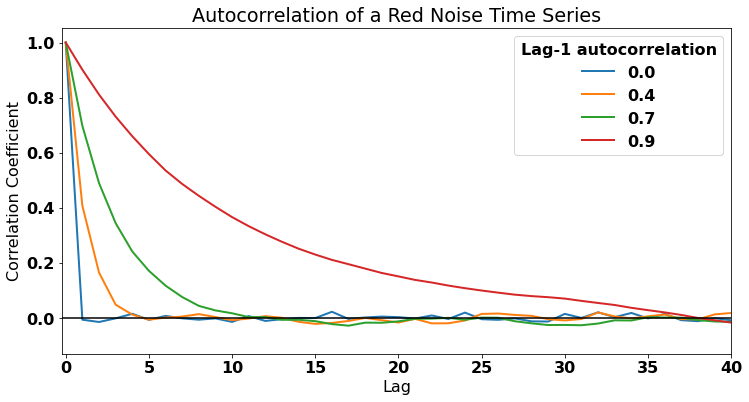

In [3]:
# initialize the array for acf
t = np.arange(0,10000,1.) #  time
acf = np.empty((len(t),len(autocorr)))

# Loop over vector of lag-1 autocorrelations
for ia,a in enumerate(autocorr):
    
    # calculate b using a
    b = np.sqrt(1. - a**2)
    
    # intialize x
    x = np.empty((len(t),))
    
    # intialize a starting value for x
    x[0] = np.random.normal(0.,1.,size=1)
    
    # Loop over time (note that we are only looping up to N-1)
    for it in range(len(t)-1):
        #  Compute red noise data
        x[it+1] = a*x[it] + b*np.random.normal(size=1)

    # Now, compute the autocorrelation function
    acf[:,ia] = np.correlate(x,x/(np.var(x)*len(x)), 'same')
    
    # Plot the ACF
    plt.figure(1,figsize=(12,6))
    # slice the correlation array so that we just show the positive lags
    plt.plot(np.arange(0,int(len(acf[:,ia])/2)),acf[int(len(acf[:,ia])/2):,ia],'-',linewidth=2)
    plt.xlim(-.25,40)

plt.axhline(0,color='k')   
plt.xlabel('Lag')
plt.ylabel('Correlation Coefficient')    
plt.legend(np.ndarray.tolist(autocorr), title = 'Lag-1 autocorrelation',fontsize=16)
plt.title('Autocorrelation of a Red Noise Time Series')

We see that we get autocorrelation functions with more or less persistence depending on the magnitude of $a$. 

Let's check that the lag-1 autocorrelation does correspond to the values of $a$ that we prescribed.

In [4]:
# lag-1 autocorrelations of x

lag1 = int(len(acf[:,ia])/2)+1

print(acf[lag1,:])

[-0.0062972   0.40745668  0.69752139  0.90162193]


Great! We see that we get the lag-1 autocorrelations that we should given the four $a$ coefficients that we prescribed.

Now let's look at two time series with identical lag-1 autocorrelations, but different white noise, $\epsilon(t)$. For each value of $a$, we will generate two red noise time series, $x$ and $y$, with the only difference being a different white noise value. We will then calculate the *correlation* (lag = 0) between $x$ and $y$. We will compute the correlation $N$ times to get a distribution of correlations for different samples of white noise.

In [5]:
# initialize the array for c
t = np.arange(0,1000,1.) 
N = 1000
c = np.empty((N,len(autocorr)))

#  Loop over vector of autocorrelations
for ia,a in enumerate(autocorr):

    # calculate b using a
    b = np.sqrt(1. - a**2)
    
    # initialize two arrays, x and y
    x = np.empty((np.size(t),))
    y = np.empty((np.size(t),))    
    
    # Loop over empty array c to populate it N times
    for ic,cval in enumerate(c[:,0]):
        x[0] = np.random.normal(size=1)
        y[0] = np.random.normal(size=1)        

        # Loop over time
        for it,tval in enumerate(t[1:]):
            x[it+1] = a*x[it] + b*np.random.normal(size=1) #  add white noise
            y[it+1] = a*y[it] + b*np.random.normal(size=1) #  add different time series of white noise
            
        # compute the correlation (lag=0)
        clag0 = np.corrcoef(x,y)
        c[ic,ia] = clag0[0,1] #  c is a function of the size of sample (1000) and auto_vec, [ic,ia]

In theory, there should be zero correlation between these two synthetic time series, but we will see that the degree of autocorrelation in these time series can influence our results.

Let's take a look by plotting the PDFs of the correlations for each value of $a$. 

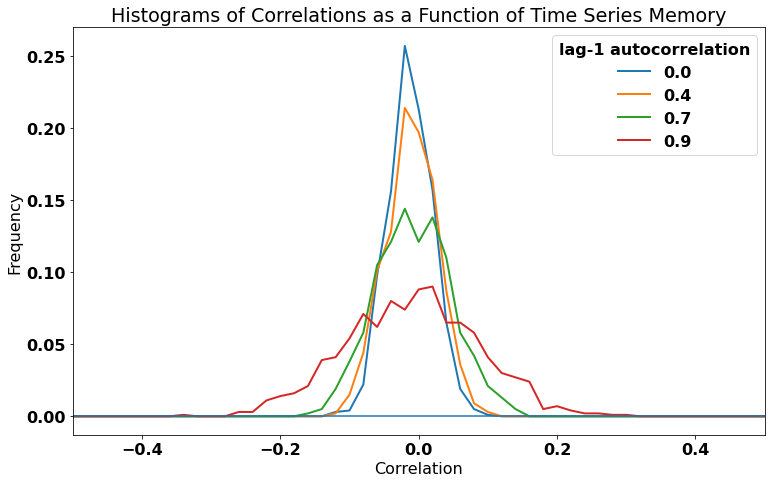

In [35]:
# calculate histograms of correlations
bins = np.arange(-1.,1.,0.02)

hc1 = np.histogram(c[:,0],bins)
hc2 = np.histogram(c[:,1],bins)
hc3 = np.histogram(c[:,2],bins)
hc4 = np.histogram(c[:,3],bins)

# plot PDFs of correlations. Convert counts to frequency by dividing by c.shape[0]
plt.figure(figsize=(11,7))
plt.plot(hc1[1][:-1],hc1[0]/c.shape[0],'-',linewidth=2)
plt.plot(hc2[1][:-1],hc2[0]/c.shape[0],'-',linewidth=2)
plt.plot(hc3[1][:-1],hc3[0]/c.shape[0],'-',linewidth=2)
plt.plot(hc4[1][:-1],hc4[0]/c.shape[0],'-',linewidth=2)

# add labels, titles, legend, etc.
plt.axhline(0)    
plt.xlabel('Correlation')
plt.ylabel('Frequency')    
plt.legend(np.ndarray.tolist(autocorr), title = 'lag-1 autocorrelation')
plt.title('Histograms of Correlations as a Function of Time Series Memory')
plt.xlim(-.5,.5)  
plt.tight_layout()

We can see that distributions all have a mean correlation of near-zero, but the distributions get wider for larger lag-1 autocorrelations ($a$). In other words, there is a greater chance of finding large magnitude correlations, *by chance*, if your time series has high autocorrelation. 

This is not something we want when we are trying to establish statistical relationships between variables. We do not want our analysis to be contaminated by autocorrelation in our time series. We cannot always avoid these spruious correlations, but if we account for autocorrletion in our data, these spurious correlations may turn out to be statistically insignificant.